#Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import plotly.express as px

In [2]:
d=pd.read_csv("/content/raw_house_data.csv")

In [3]:
# Replace common missing with NaN
d.replace(['None', 'none', 'n/a', '',' ' ,'NA','NaN'], np.nan, inplace=True)

In [4]:
print(d.isnull().sum())

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        4975 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [6]:
d.drop(['latitude', 'longitude'], axis=1, inplace=True) #Not-needed for my usecase so dropping them

In [7]:
print(d.head(10))

        MLS  sold_price  zipcode  lot_acres     taxes  year_built  bedrooms  \
0  21530491   5300000.0    85637    2154.00   5272.00        1941        13   
1  21529082   4200000.0    85646    1707.00  10422.36        1997         2   
2   3054672   4200000.0    85646    1707.00  10482.00        1997         2   
3  21919321   4500000.0    85646     636.67   8418.58        1930         7   
4  21306357   3411450.0    85750       3.21  15393.00        1995         4   
5  21528016   3250000.0    85718       1.67  27802.84        1999         3   
6  21610478   2400000.0    85712       2.10  19038.42        2001         9   
7  21211741   2500000.0    85750       1.07  21646.00        2011         6   
8  21324646   3700000.0    85718       6.73  25094.39        2002         5   
9  21812010   3250000.0    85750       3.53  18936.11        2007         5   

   bathrooms  sqrt_ft  garage  \
0       10.0  10500.0     0.0   
1        2.0   7300.0     0.0   
2        3.0      NaN     NaN  

# Handling Missing Values in Numerical Columns


In [8]:
d['garage']=d['garage'].fillna(d['garage'].median())
d['bathrooms']=d['bathrooms'].fillna(d['bathrooms'].median())
d['lot_acres']=d['lot_acres'].fillna(d['lot_acres'].median())
d['sqrt_ft'] = d['sqrt_ft'].fillna(d['sqrt_ft'].median())     # median is used not to get affected by the outliers

In [9]:
d['fireplaces'] = d['fireplaces'].astype(float)
d['fireplaces'] = d['fireplaces'].fillna(d['fireplaces'].median())

In [10]:
d['HOA']=d['HOA'].str.replace(",","").astype(float)
d['HOA'] = d['HOA'].fillna(d['HOA'].median())

In [11]:
# Replace missing values with the most frequent (mode) value in the column
d['floor_covering']=d['floor_covering'].fillna(d['floor_covering'].value_counts().index[0])
d['kitchen_features']=d['kitchen_features'].fillna(d['kitchen_features'].value_counts().index[0])

In [12]:
print(d.isnull().sum())

MLS                 0
sold_price          0
zipcode             0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64


In [13]:
d.columns

Index(['MLS', 'sold_price', 'zipcode', 'lot_acres', 'taxes', 'year_built',
       'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'kitchen_features',
       'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [14]:
# Remove if year_built equal to Zero
d=d[d.year_built!=0]

# Remove lot_acres more than 60 acres
d=d[d.lot_acres<60]

In [15]:
d

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4,21306357,3411450.0,85750,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0
5,21528016,3250000.0,85718,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.0
6,21610478,2400000.0,85712,2.10,19038.42,2001,9,8.0,12025.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0.0
7,21211741,2500000.0,85750,1.07,21646.00,2011,6,8.0,8921.0,4.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220.0
8,21324646,3700000.0,85718,6.73,25094.39,2002,5,7.0,5238.0,3.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",56.0
4996,21908591,550000.0,85750,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0
4997,21832452,475000.0,85192,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,56.0
4998,21900515,550000.0,85745,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",56.0


In [16]:
# Create new feature: price per square foot (sold_price / sqrt_ft)
d['price_per_sqft'] = round(d['sold_price'] / d['sqrt_ft'],2)

In [17]:
d['price_per_sqft']

,price_per_sqft
4,533.37
5,475.01
6,199.58
7,280.24
8,706.38
...,...
4995,137.46
4996,237.27
4997,268.06
4998,147.69


In [18]:
d

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,price_per_sqft
4,21306357,3411450.0,85750,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,533.37
5,21528016,3250000.0,85718,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.0,475.01
6,21610478,2400000.0,85712,2.10,19038.42,2001,9,8.0,12025.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0.0,199.58
7,21211741,2500000.0,85750,1.07,21646.00,2011,6,8.0,8921.0,4.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220.0,280.24
8,21324646,3700000.0,85718,6.73,25094.39,2002,5,7.0,5238.0,3.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421.0,706.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",56.0,137.46
4996,21908591,550000.0,85750,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0,237.27
4997,21832452,475000.0,85192,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,56.0,268.06
4998,21900515,550000.0,85745,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",56.0,147.69


#year by sqrt

     year_built     Average
0          1893  235.140000
1          1900  239.710000
2          1901  223.810000
3          1902  135.356667
4          1905  189.930000
..          ...         ...
106        2015  251.687857
107        2016  238.497231
108        2017  250.569259
109        2018  282.234875
110        2019  266.482121

[111 rows x 2 columns]


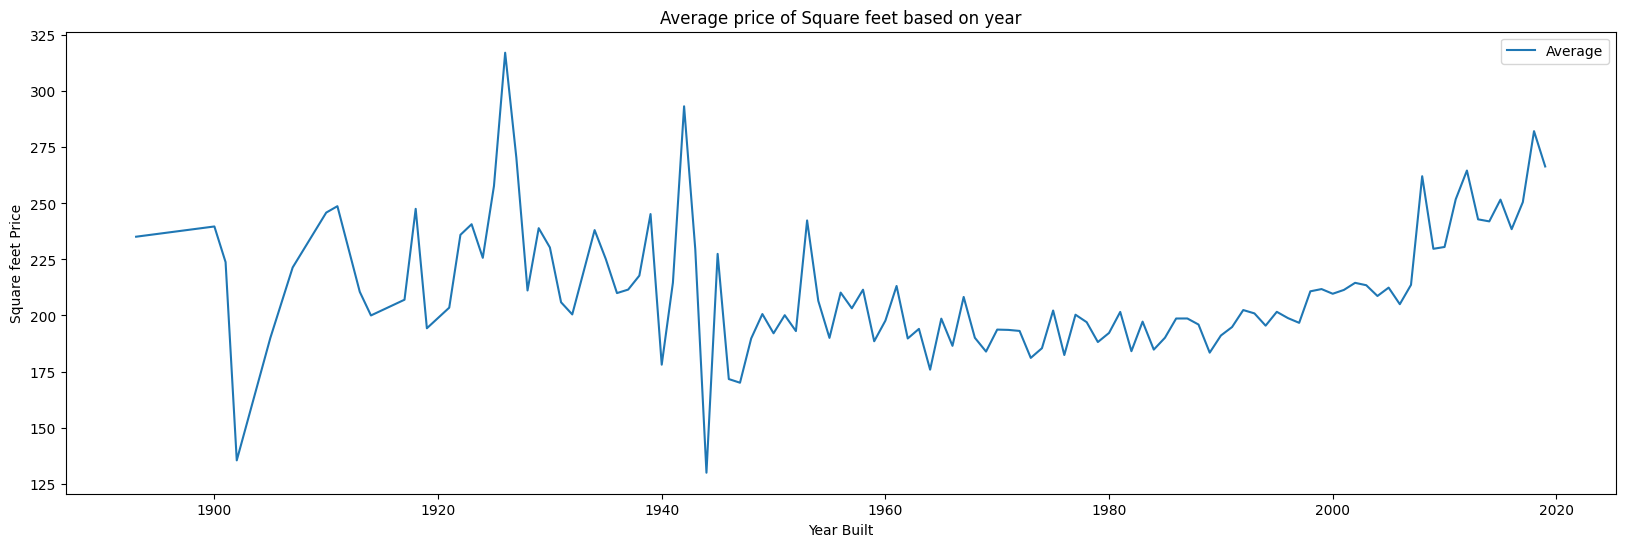

In [19]:
#year by sqrtfeet

dv= d[['year_built','price_per_sqft']].groupby(['year_built']).agg(Average=('price_per_sqft', 'mean')).reset_index()

dv = dv.sort_values(by='year_built', ascending=True)
print(dv)
dv.plot(x='year_built',kind='line',stacked=False,figsize = (20,6),
        title='Average price of Square feet based on year')

plt.xlabel('Year Built')
plt.ylabel('Square feet Price')
plt.legend()
plt.show()


In [20]:
#Converts the floor_covering text into a list of lowercase, stripped items.
d['floor_covering_list'] = d['floor_covering'].apply(lambda x: [i.strip() for i in x.lower().split(',')])

#Flattens all lists and counts frequency of each floor covering type.
all_items = [item for sublist in d['floor_covering_list'] for item in sublist]
val_cnt = Counter(all_items)

#Keeps only those floor covering types that appear at least 10 times.
threshold = 10
common_items = {item for item, count in val_cnt.items() if count >= threshold}

#Removes rare items from each list based on the threshold.
d['floor_covering_list'] = d['floor_covering_list'].apply(lambda items: [i for i in items if i in common_items])


#One-hot encodes the common floor covering types into separate binary columns.
for item in common_items:
    d[item] = d['floor_covering_list'].apply(lambda x: 1 if item in x else 0)

In [21]:
print(d.columns)

Index(['MLS', 'sold_price', 'zipcode', 'lot_acres', 'taxes', 'year_built',
       'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'kitchen_features',
       'fireplaces', 'floor_covering', 'HOA', 'price_per_sqft',
       'floor_covering_list', 'other: travertine', 'ceramic tile',
       'mexican tile', 'wood', 'concrete', 'other: brick', 'vinyl', 'other',
       'carpet', 'other: porcelain', 'laminate', 'other: porcelain tile',
       'natural stone'],
      dtype='object')


In [22]:
# Filter and count floor covering types that appear at least 10 times
print(val_cnt)
print(len(val_cnt))


filtered_dict = {k: v for k, v in val_cnt.items() if v >= 10}

print(len(filtered_dict.keys()))

Counter({'carpet': 3482, 'ceramic tile': 2505, 'natural stone': 1494, 'wood': 1218, 'concrete': 742, 'mexican tile': 643, 'other': 261, 'laminate': 77, 'vinyl': 49, 'other: porcelain tile': 32, 'other: travertine': 29, 'other: porcelain': 19, 'other: brick': 16, 'indoor/outdoor': 7, 'other: flagstone': 6, 'other: marble': 6, 'other: tile-other': 5, 'other: concrete tile': 4, 'other: saltillo': 4, 'other: travertine tile': 4, 'other: wood laminate': 4, 'other: brick pavers': 3, 'other: porcelain/engineered': 3, 'other: slate': 3, 'other: italian tile': 3, 'other: cork': 3, 'other: travertine & slate': 2, 'other: porclain tile': 2, 'other: engineered wood': 2, 'other: porcelain wood tile': 2, 'other: marble-master bath': 1, 'granite': 1, 'other: quartzite': 1, 'other: porcelyn': 1, 'other: tile': 1, 'other: brick floor': 1, 'other: lime stone': 1, 'other: limestone': 1, 'other: multiple types': 1, 'other: refinished brick': 1, 'other: studio laminate': 1, 'other: brick inlayed': 1, 'othe

In [23]:
val_cnt = dict(sorted(dict(val_cnt).items(), key=lambda item: item[1],reverse=True))

dv1 = pd.DataFrame(list(val_cnt.items()), columns=['Floor Covering', 'Frequency'])

fig = px.bar(dv1, x="Floor Covering", y="Frequency", title="Frequency of Floor Covering",text_auto=True)
fig.show()

In [24]:
# Number of feature of less than 10

filtered_dict_lt_10 = {k: v for k, v in val_cnt.items() if v <= 10}

print(len(filtered_dict_lt_10))

90


In [25]:
val_cnt = dict(sorted(filtered_dict.items(), key=lambda item: item[1],reverse=True))

dv2 = pd.DataFrame(list(val_cnt.items()), columns=['Floor Covering', 'Frequency'])

fig = px.bar(dv2, x="Floor Covering", y="Frequency", title="Frequency of Floor Covering",text_auto=True)
fig.show()

In [26]:
print(d.head(10))

         MLS  sold_price  zipcode  lot_acres     taxes  year_built  bedrooms  \
4   21306357   3411450.0    85750       3.21  15393.00        1995         4   
5   21528016   3250000.0    85718       1.67  27802.84        1999         3   
6   21610478   2400000.0    85712       2.10  19038.42        2001         9   
7   21211741   2500000.0    85750       1.07  21646.00        2011         6   
8   21324646   3700000.0    85718       6.73  25094.39        2002         5   
9   21812010   3250000.0    85750       3.53  18936.11        2007         5   
11  21131956   2050000.0    85718       1.65  24353.00        2009         5   
12  21217839   2100000.0    85637      29.60  11723.00        1995         6   
13  21625369   2200000.0    85658       1.82   5198.58        2015         4   
14  21534099   3000000.0    85739       0.00  29669.00        2008         3   

    bathrooms  sqrt_ft  garage  ... wood  concrete other: brick  vinyl  other  \
4         6.0   6396.0     3.0  ...   

In [27]:
d['floor_covering']

,floor_covering
4,"Carpet, Concrete"
5,"Natural Stone, Wood, Other"
6,"Carpet, Natural Stone, Wood, Other"
7,"Carpet, Natural Stone, Wood"
8,"Carpet, Natural Stone, Wood, Other"
...,...
4995,"Carpet, Ceramic Tile"
4996,"Carpet, Ceramic Tile"
4997,Ceramic Tile
4998,"Carpet, Ceramic Tile"


In [28]:
floor_combo_counts = d['floor_covering'].value_counts().reset_index()

In [29]:
floor_combo_counts

,floor_covering,count
0,"Carpet, Ceramic Tile",1229
1,"Carpet, Natural Stone",579
2,"Carpet, Ceramic Tile, Wood",258
3,Ceramic Tile,244
4,Concrete,240
...,...,...
297,"Carpet, Ceramic Tile, Other: Wood Laminate",1
298,"Concrete, Wood, Other: Tile bathrooms",1
299,"Carpet, Ceramic Tile, Other: Wood Plan Laminate",1
300,"Carpet, Other: Marble",1


In [30]:

d['floor_covering'] = d['floor_covering'].astype(str).apply(
    lambda x: ', '.join(sorted([i.strip().capitalize() for i in x.split(',')]))
)

floor_combo_counts = d['floor_covering'].value_counts().reset_index()
floor_combo_counts.columns = ['floor_combination', 'count']


# Total of 289 combination of floor_covering

print(floor_combo_counts)


                               floor_combination  count
0                           Carpet, Ceramic tile   1229
1                          Carpet, Natural stone    579
2                     Carpet, Ceramic tile, Wood    258
3                                   Ceramic tile    244
4                                       Concrete    240
..                                           ...    ...
284                         Carpet, Other, Vinyl      1
285        Laminate, Mexican tile, Natural stone      1
286       Carpet, Ceramic tile, Other: flagstone      1
287  Carpet, Ceramic tile, Other: new plank tile      1
288                        Concrete, Other: cork      1

[289 rows x 2 columns]


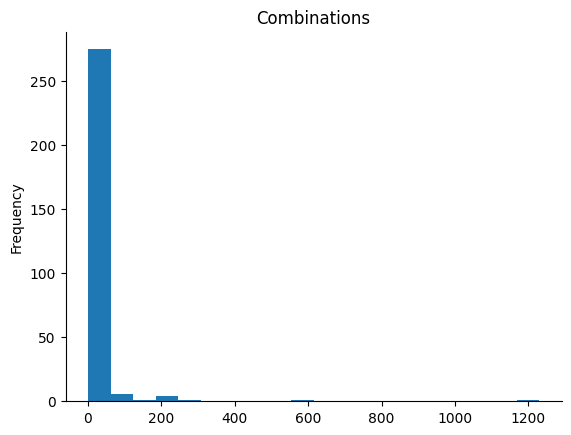

In [31]:
from matplotlib import pyplot as plt
floor_combo_counts['count'].plot(kind='hist', bins=20, title='Combinations')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
d.groupby('floor_covering')['price_per_sqft'].agg(['max', 'count']).reset_index()


,floor_covering,max,count
0,Carpet,333.33,13
1,"Carpet, Ceramic tile",447.58,1229
2,"Carpet, Ceramic tile, Concrete",378.34,57
3,"Carpet, Ceramic tile, Concrete, Indoor/outdoor...",147.91,1
4,"Carpet, Ceramic tile, Concrete, Laminate",178.57,1
...,...,...,...
284,Other: tile-other,153.76,1
285,Other: travertine,338.24,4
286,"Other: travertine, Wood",169.40,1
287,"Other: travertine/marble, Wood",177.96,1


In [33]:
d

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,...,wood,concrete,other: brick,vinyl,other,carpet,other: porcelain,laminate,other: porcelain tile,natural stone
4,21306357,3411450.0,85750,3.21,15393.00,1995,4,6.0,6396.0,3.0,...,0,1,0,0,0,1,0,0,0,0
5,21528016,3250000.0,85718,1.67,27802.84,1999,3,4.0,6842.0,3.0,...,1,0,0,0,1,0,0,0,0,1
6,21610478,2400000.0,85712,2.10,19038.42,2001,9,8.0,12025.0,4.0,...,1,0,0,0,1,1,0,0,0,1
7,21211741,2500000.0,85750,1.07,21646.00,2011,6,8.0,8921.0,4.0,...,1,0,0,0,0,1,0,0,0,1
8,21324646,3700000.0,85718,6.73,25094.39,2002,5,7.0,5238.0,3.0,...,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,4.98,2017.00,2005,5,3.0,3601.0,3.0,...,0,0,0,0,0,1,0,0,0,0
4996,21908591,550000.0,85750,1.42,4822.01,1990,4,3.0,2318.0,3.0,...,0,0,0,0,0,1,0,0,0,0
4997,21832452,475000.0,85192,12.06,1000.00,1969,3,2.0,1772.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4998,21900515,550000.0,85745,1.01,5822.93,2009,4,4.0,3724.0,3.0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
d = d.select_dtypes(include='number')
print(d.columns)

Index(['MLS', 'sold_price', 'zipcode', 'lot_acres', 'taxes', 'year_built',
       'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'HOA',
       'price_per_sqft', 'other: travertine', 'ceramic tile', 'mexican tile',
       'wood', 'concrete', 'other: brick', 'vinyl', 'other', 'carpet',
       'other: porcelain', 'laminate', 'other: porcelain tile',
       'natural stone'],
      dtype='object')


In [35]:
print(d.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4949 entries, 4 to 4999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MLS                    4949 non-null   int64  
 1   sold_price             4949 non-null   float64
 2   zipcode                4949 non-null   int64  
 3   lot_acres              4949 non-null   float64
 4   taxes                  4949 non-null   float64
 5   year_built             4949 non-null   int64  
 6   bedrooms               4949 non-null   int64  
 7   bathrooms              4949 non-null   float64
 8   sqrt_ft                4949 non-null   float64
 9   garage                 4949 non-null   float64
 10  fireplaces             4949 non-null   float64
 11  HOA                    4949 non-null   float64
 12  price_per_sqft         4949 non-null   float64
 13  other: travertine      4949 non-null   int64  
 14  ceramic tile           4949 non-null   int64  
 15  mexican t

In [36]:
X = d.drop('sold_price',axis=1)
X = d.drop('MLS',axis=1)

In [37]:
X = d.drop('price_per_sqft',axis=1)

X= X.to_numpy()
y = d['price_per_sqft'].values


In [38]:
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]




In [39]:
def MAE(Y,Y_hat):
  return np.sum(np.abs((Y-Y_hat)))/len(Y)

def R2(Y,Y_hat):
  N=len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y,Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

#Multi_variant_Linear regression

In [40]:
class MVLinearRegression():
  def fit(self,X,y,eta=1e-5,epochs=1e3,show_curve=True):
    epochs=int(epochs)
    N,D=X.shape
    Y=y

    self.X_mean = np.mean(X, axis=0)
    self.X_std = np.std(X, axis=0) + 1e-8
    X_norm = (X - self.X_mean) / self.X_std

    self.W=np.random.randn(D)
    self.J=np.zeros(epochs)

    for epoch in range(epochs):
      Y_hat=self.predict(X)
      self.J[epoch]=OLS(Y,Y_hat,N)
      self.W-=eta*(1/N)*(X_norm.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self,X):
    X_norm = (X - self.X_mean) / self.X_std
    return X_norm@self.W

In [41]:
print(type(X_train),type(y_train))

print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(3959, 25)
(3959,)


In [42]:
print(y_train.min(), y_train.max())

24.54 969.31


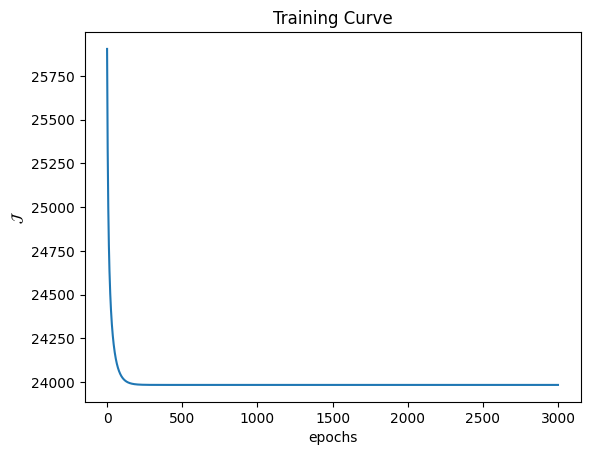

In [43]:
model=MVLinearRegression()
model.fit(X_train,y_train,eta=0.05,epochs=3000)

In [44]:
y_hat = model.predict(X_test)

In [45]:
R2(y_test,y_hat)

np.float64(0.012628296265709826)